# Figure 11.14 - CMIP6 temperature bias

* Adapted from Wehner et al. ([2020](https://www.sciencedirect.com/science/article/pii/S2212094719302440))
* re-draw Figure 9

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import mplotutils as mpu
import numpy as np
import xarray as xr

import conf
import filefinder as ff
from utils import computation, plot

In [2]:
mpl.rcParams['font.sans-serif'] = "Arial"

## Data

In [3]:
ff_bias = ff.FileFinder(
    path_pattern="../data/wehner_2020/",
    file_pattern="{varn}_CMIP6_errors_{dataset}.nc",
)

files_bias = ff_bias.find_files()

### Load Data

**bias**

In [4]:
bias_rx1day = computation.process_datalist(
    xr.open_dataset, files_bias.search(varn="Rx")
)

### Plot (bias)

In [5]:
no_data_color = "0.9"

In [6]:
ds = computation.select_by_metadata(bias_rx1day, dataset="REGEN")[0][0]
da = ds["Rx1day_annual_percent_error_REGEN"]
da = da.rename(latitude="lat", longitude="lon")

In [7]:
ds = computation.select_by_metadata(bias_rx1day, dataset="ERA5")[0][0]
da = ds["Rx1day_annual_percent_error_ERA5"]

# coarsen the data -> else it is too high resolution
def coarsen(da):
    return da.coarsen(lat=4, lon=4, boundary="trim").mean()

# **Figure 11.14**

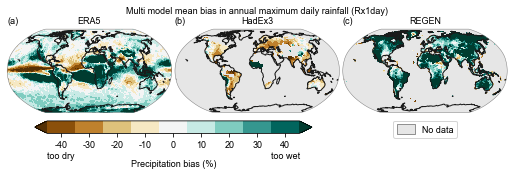

In [8]:
f, axes = plot.map_subplots(1, 3)

levels = np.arange(-45, 46, 10)


opt = dict(
    levels=levels,
    cmap="BrBG",
    plotfunc="contourf",
)

# ======
ax = axes[0]

ds = computation.select_by_metadata(bias_rx1day, dataset="ERA5")[0][0]
da = ds["Rx1day_annual_percent_error_ERA5"]
da = coarsen(da)

h = plot.one_map_flat(da, ax=ax, **opt)
ax.set_title("ERA5", size=9)

# ======
ax = axes[1]

ds = computation.select_by_metadata(bias_rx1day, dataset="HadEx3")[0][0]
da = ds["Rx1day_annual_percent_error_HadEx3"]
da = da.rename(latitude="lat", longitude="lon")

h = plot.one_map_flat(da, ax=ax, **opt)
ax.set_title("HadEx3", size=9)

# ======
ax = axes[2]

ds = computation.select_by_metadata(bias_rx1day, dataset="REGEN")[0][0]
da = ds["Rx1day_annual_percent_error_REGEN"]
da = da.rename(latitude="lat", longitude="lon")

h = plot.one_map_flat(da, ax=ax, **opt)
ax.set_title("REGEN", size=9)

# ==

ticks = np.arange(-40, 41, 10)
ticklabels = [str(t) for t in ticks]
ticklabels[0] += "\ntoo dry"
ticklabels[-1] += "\ntoo wet"

cbar = mpu.colorbar(
    h,
    axes[0],
    axes[1],
    size=0.15,
    shrink=0.25 * 0.66,
    orientation="horizontal",
    pad=0.1,
)

cbar.set_ticks(ticks)
cbar.set_ticklabels(ticklabels)

cbar.set_label("Precipitation bias (%)", labelpad=-1, size=9)
cbar.ax.tick_params(labelsize=9)


# ==

no_data_color = "0.9"
label = "No data"
dummy_patch = mpatches.Patch(fc=no_data_color, ec="0.2", label=label, lw=0.5)


axes[2].legend(
    handles=[dummy_patch],
    handlelength=2,
    handleheight=1.25,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.3),
    fontsize=9,
    borderaxespad=0,
    frameon=True,
    ncol=1,
)

# ======

axes[0].set_title("(a)", loc="left", fontsize=9)
axes[1].set_title("(b)", loc="left", fontsize=9)
axes[2].set_title("(c)", loc="left", fontsize=9)

for ax in axes:
    ax.patch.set_facecolor(no_data_color)

f.suptitle(
    "Multi model mean bias in annual maximum daily rainfall (Rx1day)", fontsize=9
)

left_right = 0.0125

side = 0.01
plt.subplots_adjust(wspace=0.02, left=side, right=1 - side, bottom=0.33, top=0.84)

mpu.set_map_layout(axes, width=18)

f.canvas.draw()

fN = conf.figure_filename("rx1day_bias", "Figure_11.14_Wehner_precipitation_bias")
plt.savefig(fN + ".pdf", dpi=300)
plt.savefig(fN + ".png", dpi=300)